## Ambiguity under nonlinear approximations

Wouter Kouw, last update: 27-01-2023


In [23]:
using Pkg
Pkg.activate("..")
Pkg.instantiate()

  Activating project at `~/syndr/Wouter/Onderzoek/Projecten/tue/efe-planning/FRAI2023-nlamb`


In [24]:
using Optim
using ForwardDiff
using ProgressMeter
using LinearAlgebra
using Distributions
using Plots
default(label="", grid=false, linewidth=3, markersize=3, margin=10Plots.pt)
include("../util.jl")

ET (generic function with 2 methods)

## Check ambiguity for range of states

In [25]:
# Grid over state space
N = 500
states = range(0, stop=2π, length=N)

# Observation function
g(z) = cos(z)

# Observation noise
R = 1e-2

0.01

In [26]:
S_t = 1.0

amb = zeros(N)    
for (i,m_t) in enumerate(states)

    # Unscented transform moments
    mU, SU, CU = UT(m_t, S_t, g, addmatrix=R, α=1e-3, β=2.0, κ=0.0)

    # E_q(z_t | u_t)[H[q(y_t | z_t)]]
    amb[i] = log(SU-CU'*inv(S_t)*CU)
    
end

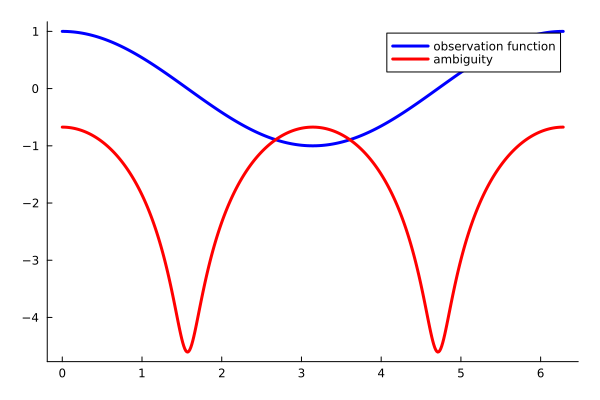

In [27]:
plot(states, g.(states), color="blue", label="observation function")
plot!(states, amb, color="red", label="ambiguity")

In [28]:
# Observation function
g(z) = sin(z)

# Derivatives
J(z) = ForwardDiff.derivative(g, z)
H(z) = ForwardDiff.derivative(J, z)

# Curvature
κ(z) = abs(H(z))/(1+ J(z)^2)^(3/2)

κ (generic function with 1 method)

In [29]:
ambUT = zeros(N)    
for (i,m_t) in enumerate(states)

    # Unscented transform moments
    mU, SU, CU = UT(m_t, S_t, g, addmatrix=R)

    # Calculate ambiguity
    ambUT[i] = log(max(1e-8,SU-CU'*inv(S_t)*CU))
    
end

In [30]:
ambET = zeros(N)    
for (i,m_t) in enumerate(states)

    # Unscented transform moments
    mE, SE, CE = ET(m_t, S_t, g, addmatrix=R)

    # Calculate ambiguity
    ambET[i] = log(max(1e-8,SE-CE'*inv(S_t)*CE))
    
end

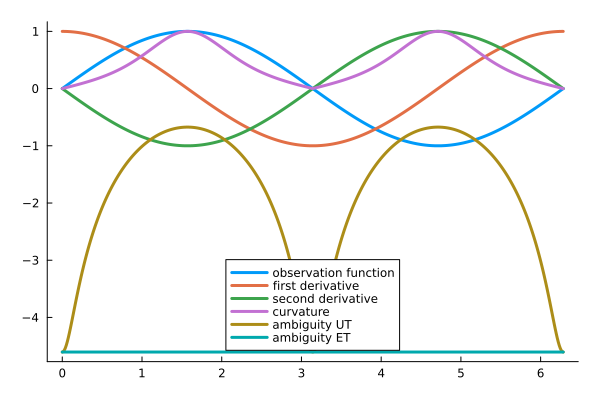

In [31]:
plot(states, g.(states), label="observation function")
plot!(states, J.(states), label="first derivative")
plot!(states, H.(states), label="second derivative")
plot!(states, κ.(states), label="curvature")
plot!(states, ambUT, label="ambiguity UT", legend=:bottom)
plot!(states, ambET, label="ambiguity ET", legend=:bottom)

In [32]:
# Observation function
g(z) = sqrt((z-1)^2)

# Derivatives
J(z) = ForwardDiff.derivative(g, z)
H(z) = ForwardDiff.derivative(J, z)

# Curvature
κ(z) = abs(H(z))/(1+ J(z)^2)^(3/2)

κ (generic function with 1 method)

In [33]:
ambUT = zeros(N)    
for (i,m_t) in enumerate(states)

    # Unscented transform moments
    mU, SU, CU = UT(m_t, S_t, g, addmatrix=R)

    # Calculate ambiguity
    ambUT[i] = log(max(1e-8,SU-CU'*inv(S_t)*CU))
    
end

In [34]:
ambET = zeros(N)    
for (i,m_t) in enumerate(states)

    # Unscented transform moments
    mE, SE, CE = ET(m_t, S_t, g, addmatrix=R)

    # Calculate ambiguity
    amb[i] = log(max(1e-8,SE-CE'*inv(S_t)*CE))
    
end

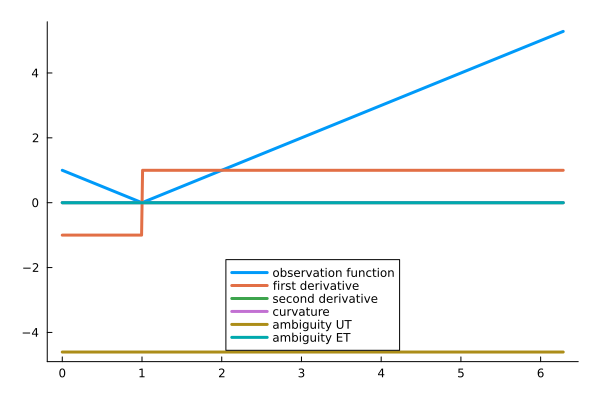

In [35]:
plot(states, g.(states), label="observation function")
plot!(states, J.(states), label="first derivative")
plot!(states, H.(states), label="second derivative")
plot!(states, κ.(states), label="curvature")
plot!(states, ambUT, label="ambiguity UT", legend=:bottom)
plot!(states, ambET, label="ambiguity ET", legend=:bottom)